In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

52.00723299153404 23.678591825860252
-11.014835760582699 138.11446558725896
37.223407405199254 -65.32780373828795
-72.89026103230223 -76.90392568916198
78.12465266143099 172.39473709650127
-43.37440836074188 -68.72136112342133
-8.531999447136684 59.61760525169251
-24.66264576012665 160.02677754896558
-31.505348775668224 108.89898994021422
-71.44367263851959 -111.20355864043349
-29.160445398987058 -117.08752912234402
25.342189145878606 -134.3518231978889
-66.4795862718179 114.83858836499331
-68.96160549009346 -4.667464443079922
12.903019097161092 -75.59221559358852
-11.709222158354848 60.80876540592462
-26.233236701478432 125.5670106626443
66.63532576106059 -111.46757777118728
-13.549237974917062 123.8377848718103
-38.39326458993391 -116.15293944123763
-44.284002113193324 -53.13884436737429
54.333789886234285 -31.12602228525091
71.7285480123216 -156.91434695318395
-50.774653240733166 -62.01371190520929
-25.311435380177386 -89.92135358061395
-41.134133401427974 161.5969036999935
-77.1831

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []


# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
        
# Print the city count to confirm sufficient count.

len(cities)

569

In [7]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c42cd49324ba066af7974ba19c8913f


In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")


# Create counters.

record_count = 1

set_count = 1


# Loop through all the cities in our list.

for i in range(len(cities)):

    
    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    # Add 1 to the record count.
    
    record_count += 1
    
    
# Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

        
# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

    
# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of Set 1

Processing Record 8 of Set 5 | ushuaia
Processing Record 9 of Set 5 | ushuaia
Processing Record 10 of Set 5 | ushuaia
Processing Record 11 of Set 5 | ushuaia
Processing Record 12 of Set 5 | ushuaia
Processing Record 13 of Set 5 | ushuaia
Processing Record 14 of Set 5 | ushuaia
Processing Record 15 of Set 5 | ushuaia
Processing Record 16 of Set 5 | ushuaia
Processing Record 17 of Set 5 | ushuaia
Processing Record 18 of Set 5 | ushuaia
Processing Record 19 of Set 5 | ushuaia
Processing Record 20 of Set 5 | ushuaia
Processing Record 21 of Set 5 | ushuaia
Processing Record 22 of Set 5 | ushuaia
Processing Record 23 of Set 5 | ushuaia
Processing Record 24 of Set 5 | ushuaia
Processing Record 25 of Set 5 | ushuaia
Processing Record 26 of Set 5 | ushuaia
Processing Record 27 of Set 5 | ushuaia
Processing Record 28 of Set 5 | ushuaia
Processing Record 29 of Set 5 | ushuaia
Processing Record 30 of Set 5 | ushuaia
Processing Record 31 of Set 5 | ushuaia
Processing Record 32 of Set 5 | ushuaia
Pr

Processing Record 15 of Set 9 | ushuaia
Processing Record 16 of Set 9 | ushuaia
Processing Record 17 of Set 9 | ushuaia
Processing Record 18 of Set 9 | ushuaia
Processing Record 19 of Set 9 | ushuaia
Processing Record 20 of Set 9 | ushuaia
Processing Record 21 of Set 9 | ushuaia
Processing Record 22 of Set 9 | ushuaia
Processing Record 23 of Set 9 | ushuaia
Processing Record 24 of Set 9 | ushuaia
Processing Record 25 of Set 9 | ushuaia
Processing Record 26 of Set 9 | ushuaia
Processing Record 27 of Set 9 | ushuaia
Processing Record 28 of Set 9 | ushuaia
Processing Record 29 of Set 9 | ushuaia
Processing Record 30 of Set 9 | ushuaia
Processing Record 31 of Set 9 | ushuaia
Processing Record 32 of Set 9 | ushuaia
Processing Record 33 of Set 9 | ushuaia
Processing Record 34 of Set 9 | ushuaia
Processing Record 35 of Set 9 | ushuaia
Processing Record 36 of Set 9 | ushuaia
Processing Record 37 of Set 9 | ushuaia
Processing Record 38 of Set 9 | ushuaia
Processing Record 39 of Set 9 | ushuaia


In [11]:
# Loop through all the cities in the list.

for i, city in enumerate(cities):
    

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    # Add 1 to the record count.
    
    record_count += 1
    
    
    # Run an API request for each of the cities.
    
    try:
        
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
        
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

        
# If an error is experienced, skip the city.

    except:

        print("City not found. Skipping...")
        
        pass

    
# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Processing Record 20 of Set 12 | brest
Processing Record 21 of Set 12 | nhulunbuy
Processing Record 22 of Set 12 | saint george
Processing Record 23 of Set 12 | ushuaia
Processing Record 24 of Set 12 | pevek
Processing Record 25 of Set 12 | comodoro rivadavia
Processing Record 26 of Set 12 | victoria
Processing Record 27 of Set 12 | koumac
Processing Record 28 of Set 12 | geraldton
Processing Record 29 of Set 12 | punta arenas
Processing Record 30 of Set 12 | rikitea
Processing Record 31 of Set 12 | lompoc
Processing Record 32 of Set 12 | albany
Processing Record 33 of Set 12 | cape town
Processing Record 34 of Set 12 | puerto colombia
Processing Record 35 of Set 12 | cap malheureux
Processing Record 36 of Set 12 | yulara
Processing Record 37 of Set 12 | yellowknife
Processing Record 38 of Set 12 | kupang
Processing Record 39 of Set 12 | mar del plata
Processing Record 40 of Set 12 | grindavik
Processing Record 41 of Set 12 | barrow
Processing Record 42 of Set 12 | rio gallegos
Process

Processing Record 33 of Set 15 | praia
Processing Record 34 of Set 15 | liverpool
Processing Record 35 of Set 15 | lamu
Processing Record 36 of Set 15 | bengkulu
Processing Record 37 of Set 15 | arman
Processing Record 38 of Set 15 | east london
Processing Record 39 of Set 15 | cherskiy
Processing Record 40 of Set 15 | santa rosa
Processing Record 41 of Set 15 | burica
City not found. Skipping...
Processing Record 42 of Set 15 | santa marta
Processing Record 43 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 15 | priekule
Processing Record 45 of Set 15 | klaksvik
Processing Record 46 of Set 15 | wanlaweyn
Processing Record 47 of Set 15 | isangel
Processing Record 48 of Set 15 | natal
Processing Record 49 of Set 15 | marystown
Processing Record 50 of Set 15 | saint-pierre
Processing Record 1 of Set 16 | sitka
Processing Record 2 of Set 16 | garden city
Processing Record 3 of Set 16 | umm lajj
Processing Record 4 of Set 16 | disa
Processing Record 5 of Se

Processing Record 18 of Set 19 | san patricio
Processing Record 19 of Set 19 | merauke
Processing Record 20 of Set 19 | sakakah
Processing Record 21 of Set 19 | krasnoselkup
Processing Record 22 of Set 19 | salta
Processing Record 23 of Set 19 | erenhot
Processing Record 24 of Set 19 | kukuna
Processing Record 25 of Set 19 | wilmington
Processing Record 26 of Set 19 | estevan
Processing Record 27 of Set 19 | north bend
Processing Record 28 of Set 19 | waterloo
Processing Record 29 of Set 19 | pangai
Processing Record 30 of Set 19 | chimbote
Processing Record 31 of Set 19 | myronivka
Processing Record 32 of Set 19 | ondorhaan
City not found. Skipping...
Processing Record 33 of Set 19 | tomatlan
Processing Record 34 of Set 19 | broome
Processing Record 35 of Set 19 | fortuna
Processing Record 36 of Set 19 | los llanos de aridane
Processing Record 37 of Set 19 | bathsheba
Processing Record 38 of Set 19 | rongcheng
Processing Record 39 of Set 19 | sri aman
Processing Record 40 of Set 19 | 

Processing Record 5 of Set 23 | kamphaeng phet
Processing Record 6 of Set 23 | springfield
Processing Record 7 of Set 23 | anito
Processing Record 8 of Set 23 | tocantinopolis
City not found. Skipping...
Processing Record 9 of Set 23 | korla
Processing Record 10 of Set 23 | celestun
Processing Record 11 of Set 23 | ugra
Processing Record 12 of Set 23 | simbahan
Processing Record 13 of Set 23 | haines junction
Processing Record 14 of Set 23 | bilibino
Processing Record 15 of Set 23 | porto walter
Processing Record 16 of Set 23 | beyneu
Processing Record 17 of Set 23 | wewak
Processing Record 18 of Set 23 | beruni
City not found. Skipping...
Processing Record 19 of Set 23 | cabo san lucas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24
1,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24
2,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24
3,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24
4,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24
5,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24
6,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24
7,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24
8,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24
9,Ushuaia,-54.8,-68.3,44.26,76,75,29.93,AR,2022-12-29 02:40:24


In [13]:
# Create the output file (CSV).

output_data_file = "Weather_Database/cities.csv"


# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

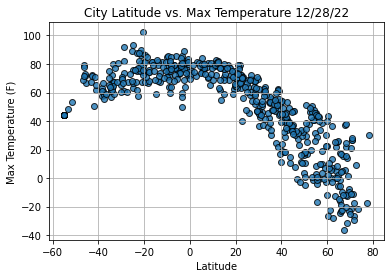

In [15]:
# Import time module

import time


# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,

            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_database/Fig1.png")


# Show plot.

plt.show()

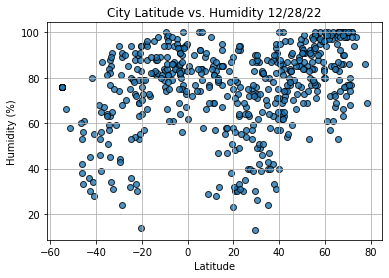

In [16]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_database/Fig2.png")


# Show plot.

plt.show()

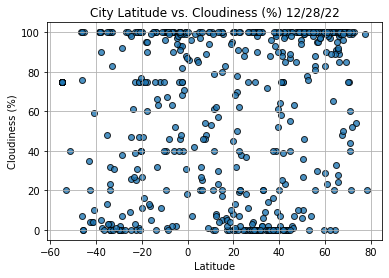

In [17]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_database/Fig3.png")


# Show plot.

plt.show()

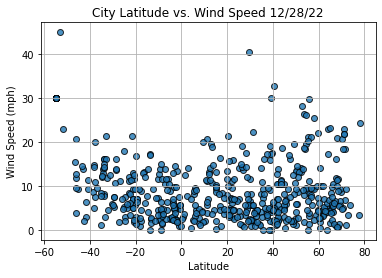

In [18]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,

            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_database/Fig4.png")


# Show plot.

plt.show()

In [19]:
# Import linregress

from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    
    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [21]:
city_data_df["Lat"] >= 0

0       False
1       False
2       False
3       False
4       False
        ...  
1085     True
1086    False
1087     True
1088    False
1089     True
Name: Lat, Length: 1090, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
569,Brest,52.1000,23.7000,38.10,69,100,13.13,BY,2022-12-29 02:53:06
571,Saint George,37.1041,-113.5841,46.99,42,0,4.00,US,2022-12-29 02:51:02
573,Pevek,69.7008,170.3133,-7.35,98,100,8.57,RU,2022-12-29 02:53:08
575,Victoria,22.2855,114.1577,63.25,63,62,11.01,HK,2022-12-29 02:49:33
580,Lompoc,34.6391,-120.4579,53.53,88,0,8.05,US,2022-12-29 02:53:10
...,...,...,...,...,...,...,...,...,...
1083,Simbahan,6.3032,120.5836,80.28,79,100,9.01,PH,2022-12-29 03:05:55
1084,Haines Junction,60.7522,-137.5108,10.78,99,100,0.40,CA,2022-12-29 03:07:18
1085,Bilibino,68.0546,166.4372,-20.42,99,99,0.67,RU,2022-12-29 03:07:18
1087,Beyneu,45.3167,55.2000,30.70,83,98,6.53,KZ,2022-12-29 03:07:19


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
569,Brest,52.1000,23.7000,38.10,69,100,13.13,BY,2022-12-29 02:53:06
571,Saint George,37.1041,-113.5841,46.99,42,0,4.00,US,2022-12-29 02:51:02
573,Pevek,69.7008,170.3133,-7.35,98,100,8.57,RU,2022-12-29 02:53:08
575,Victoria,22.2855,114.1577,63.25,63,62,11.01,HK,2022-12-29 02:49:33
580,Lompoc,34.6391,-120.4579,53.53,88,0,8.05,US,2022-12-29 02:53:10


In [24]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

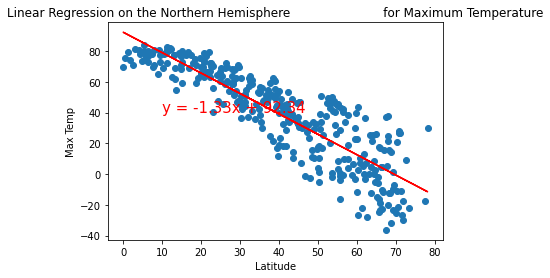

In [25]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

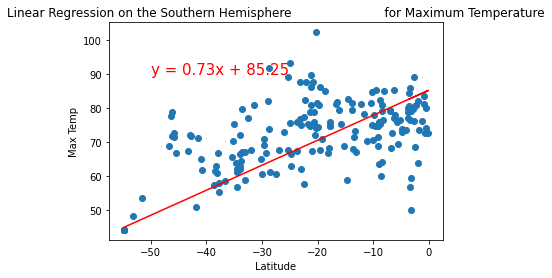

In [26]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

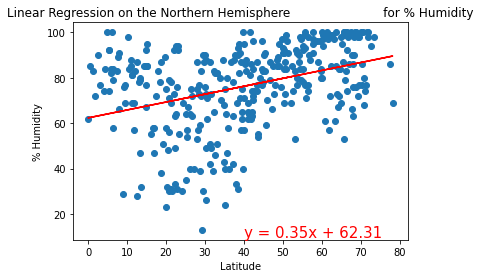

In [27]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Humidity', '% Humidity',(40,10))

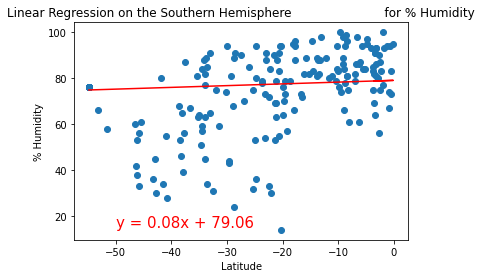

In [28]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

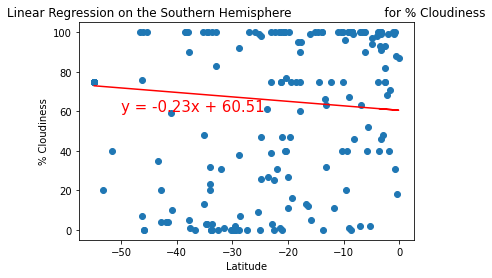

In [29]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))

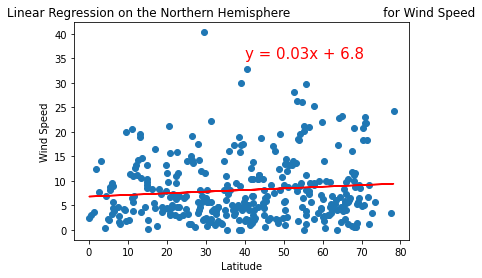

In [30]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))

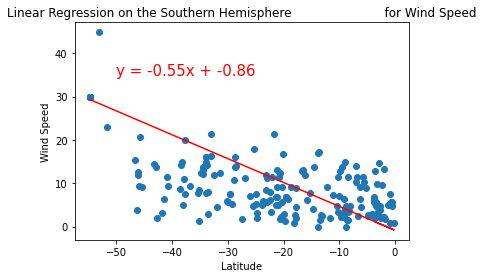

In [31]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Wind Speed', 'Wind Speed',(-50,35))